In [5]:
import ipyparallel
clients = ipyparallel.Client()
clients.block = True  # use synchronous computations
print(clients.ids)

[0, 1, 2, 3]


In [6]:
%autopx

%autopx enabled


In [1]:
from mpi4py import MPI
print(MPI.COMM_WORLD.size)
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt

1
Using MPI version 4.0, 1 processes


/home/maple/anaconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/maple/anaconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/maple/anaconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/maple/anaconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


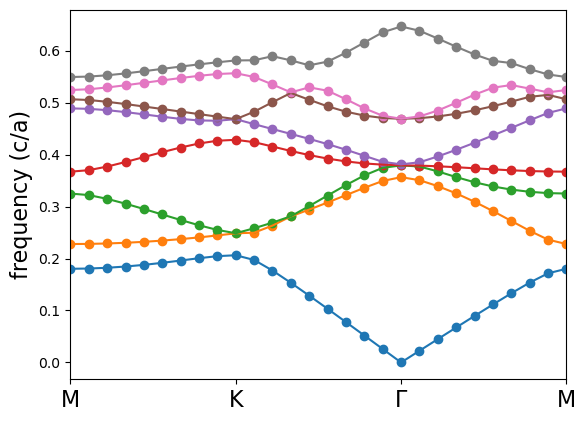

In [2]:
a = 1
resolution = 32
num_bands = 8
k = 0.22
out_file = 'band_cal.log'

k_points = [mp.Vector3(y=0.5),          # M
            mp.Vector3(-1 / 3, 1 / 3),  # K
            mp.Vector3(),               # Gamma
            mp.Vector3(y=0.5),]         # M            
k_points = mp.interpolate(8, k_points)

geometry = [mp.Block(size=mp.Vector3(mp.inf,mp.inf),material=mp.Medium(epsilon=3.3037**2)),
            mp.Cylinder(k*a, material=mp.Medium(epsilon=1))]
geometry_lattice = mp.Lattice(size=mp.Vector3(a, a),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

'''Hexagonal lattice of rods: all bands'''

import sys
current = sys.stdout
f = open(out_file, 'w+')
sys.stdout = f
ms.run_te()
sys.stdout = current

'''md = mpb.MPBData(rectify=True, periods=3, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()'''
from source.postprocessing import *
bands_data = grep(out_file, 'tefreqs:,')
bands_data = io.StringIO(bands_data.getvalue())
bands_plot(bands_data, num_bands, ['M', 'K', 'Γ', 'M'], 'band_cal.png')